# Visualization of Soccer Heatmap

https://www.kaggle.com/technika148/football-database

In [1]:
import numpy as np
import pandas as pd

import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
leagues = pd.read_csv(r'/content/drive/MyDrive/Proyecto Final/data/kaggle/leagues.csv')
players = pd.read_csv(r'/content/drive/MyDrive/Proyecto Final/data/kaggle/players.csv', encoding='latin1')
games = pd.read_csv(r'/content/drive/MyDrive/Proyecto Final/data/kaggle/games.csv')
appearances = pd.read_csv('/content/drive/MyDrive/Proyecto Final/data/kaggle/appearances.csv')
shots = pd.read_csv('/content/drive/MyDrive/Proyecto Final/data/kaggle/shots.csv')
team = pd.read_csv('/content/drive/MyDrive/Proyecto Final/data/kaggle/teams.csv')
team_stats = pd.read_csv('/content/drive/MyDrive/Proyecto Final/data/kaggle/teamstats.csv')

In [5]:
# Esta funcion nos permite dibujar un campo de futbol con las dimenciones reglamentarias en una grafica

def draw_soccer_pitch(figsize=(14, 11)):
    
    """
    Function that plots a scaled soccer pitch of length 120*90 metres which 
    are the maximum dimensions allowed by FIFAs "Laws Of The Game"
    """
    
    rect = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)
    # Main pitch markings, ie sidelines, penalty area and halfway line
    plt.plot([0, 0,  0, 120, 120, 0,     0,  16.5,  16.5,     0,     0,   5.5,   5.5, 
                  0,  0, 60, 60, 120,   120, 103.5, 103.5,   120,   120, 114.5, 114.5,   120], 
             [0, 0, 90,  90,   0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 
              36.85, 90, 90,  0,   0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85], color='white')
    
    # Secondary pitch markings, ie penalty spots, centre circle etc
    plt.plot([11, 11.5],[45, 45], color='white')
    plt.plot([109, 108.5],[45, 45], color='white')
    
    centre_circle = patches.Circle([60, 45], 9.15, edgecolor='white', facecolor='darkgreen')
    ax.add_patch(centre_circle)
    
    left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270.0, theta2=90.0, color='white')
    ax.add_patch(left_arc)
    right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90.0, theta2=270.0, color='white')
    ax.add_patch(right_arc)
    
    bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0.0, theta2=90.0, color='white')
    tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270.0, color='white')
    br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90.0, theta2=180.0, color='white')
    tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180.0, theta2=270.0,color='white')
    ax.add_patch(bl_corner)
    ax.add_patch(tl_corner)
    ax.add_patch(br_corner)
    ax.add_patch(tr_corner)
    
    plt.xlim(-1, 121)
    plt.ylim(-1, 91)
    plt.axis('off')    

    return fig, ax

¿Desde qué posición del campo es más efectivo hacer goles?

In [8]:
# Vamos a obtener un DataFrame que solo contenga los goles que terminaron en goles y los autores. Para ello tenemos que
# unir la tabla shots con la tabla player a traves de la llave 'playerID'

best_strikers = pd.merge(appearances, players, on='playerID')
best_strikers = best_strikers.groupby('name').agg({'goals': 'sum', 'shots': 'sum'}).sort_values('goals', ascending=False).head(20).reset_index()

goals = shots[(shots['shotResult'] == 'Goal')]
goals.rename(columns = {'shooterID': 'playerID'}, inplace=True)
goals = pd.merge(goals, players, on='playerID')

# Las posiciones de los goles estan normalizadas. Las multiplicamos por las dimenciones de la cancha
goals['positionX'] = goals['positionX'].apply(lambda x: x * 120)
goals['positionY'] = goals['positionY'].apply(lambda x: x * 90)

# Tomamos el nombre de los mejores goleadores y lo colocamos en una lista
top = best_strikers['name']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



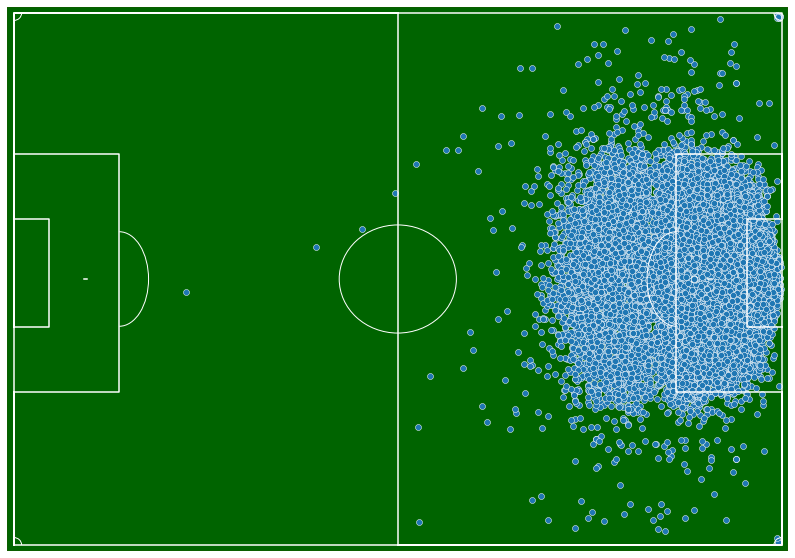

In [9]:
# Scatter plot of all the Goals

# Plot Style
draw_soccer_pitch(figsize=(14, 10))
plt.style.use('tableau-colorblind10')

# Plot Configuration
sns.scatterplot(data=goals, x='positionX', y='positionY')
# plt.savefig(r"pictures\all_goals.png", transparent=True)
plt.show()

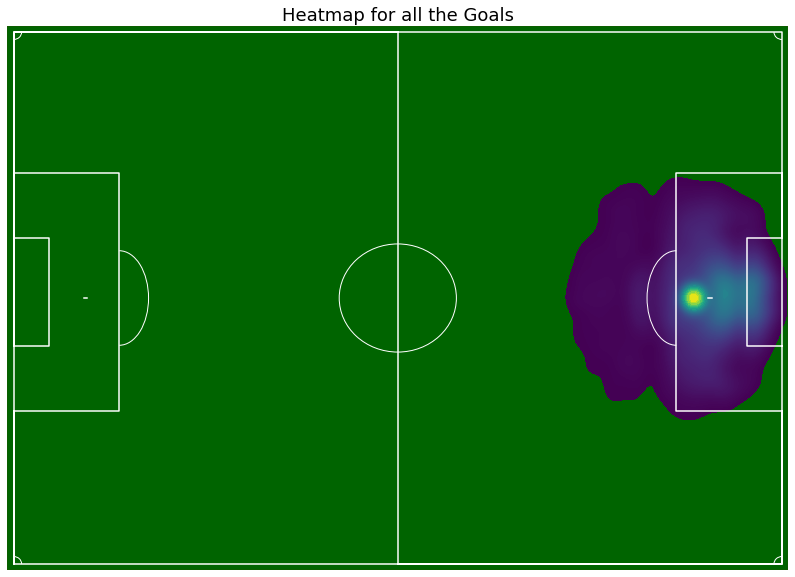

In [10]:
# Heatmap of all the Goals

# Ploat Style
draw_soccer_pitch(figsize=(14, 10))
plt.style.use('tableau-colorblind10')

# Plot Configuration
ax = sns.kdeplot(x=goals['positionX'], y=goals['positionY'], shade=True, n_levels=100, cmap='viridis')
ax.set_title(f'Heatmap for all the Goals', fontsize=18)
# plt.savefig(r"pictures\heatmap.png", transparent=True)
plt.show()

A partir de esta gráfica se concluye que la mejor posición para hacer gol es en el centro del área, ya que es donde se hicieron la mayor cantidad de goles. Dentro de nuestro mapa de calor se encuentra el 96% de todos nuestros goles (que son un total de 34.500).

Por otro lado, el porcentaje de goles realizados por penalti son de apenas un 9%. Esto es importante mencionarlo, ya que se podría pensar que los goles por penalti están causando que el punto de mayor densidad de goles sea el mostrado en la gráfica. Sin embargo, el porcentaje nos demuestra lo contrario.

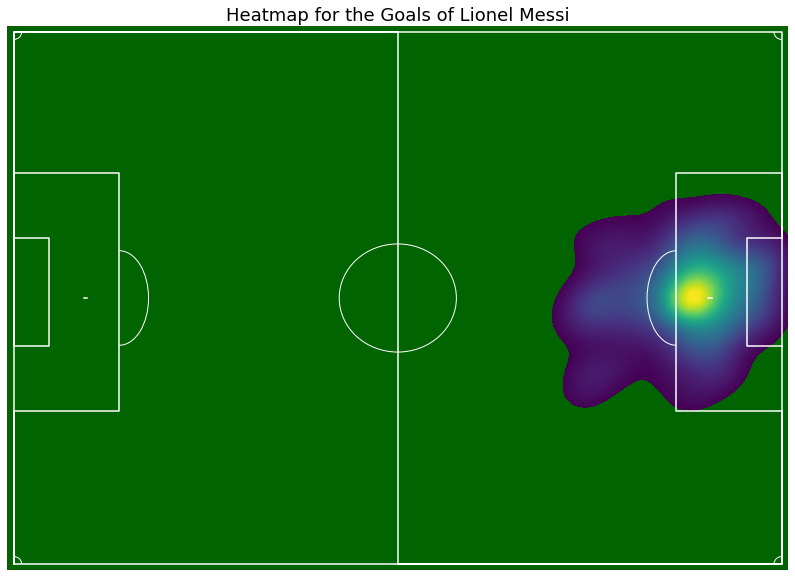

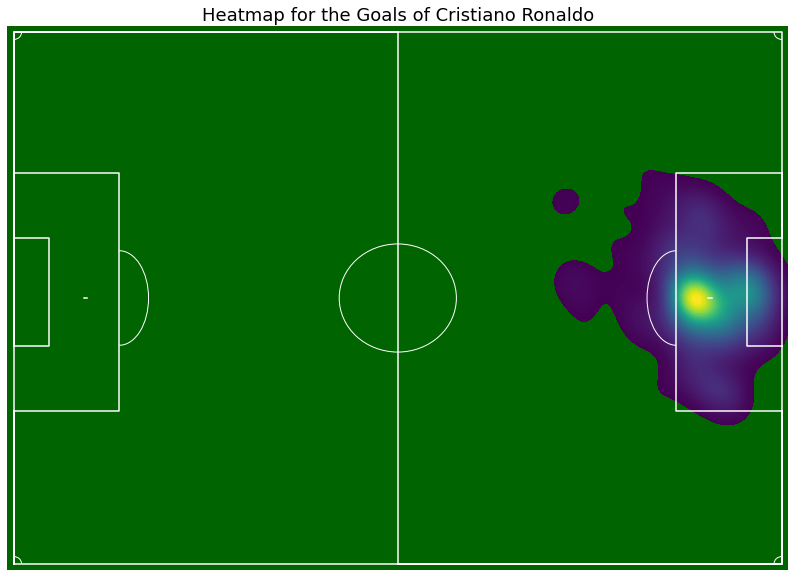

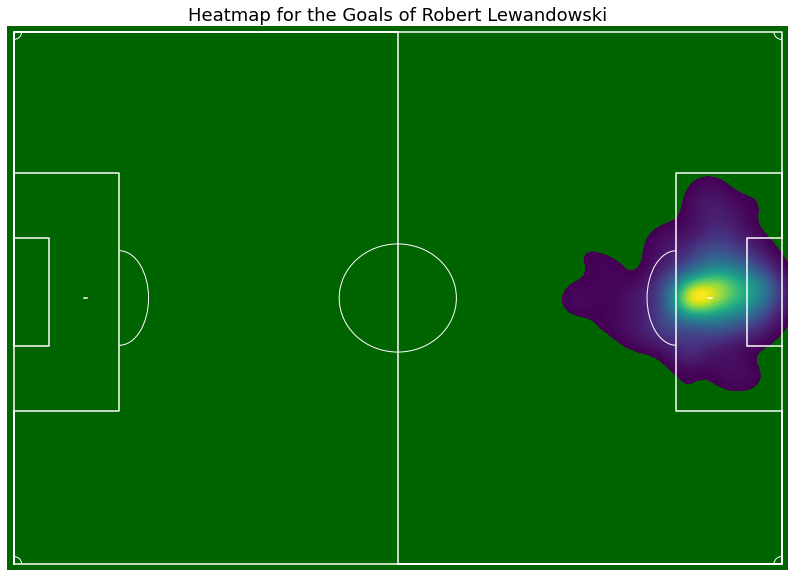

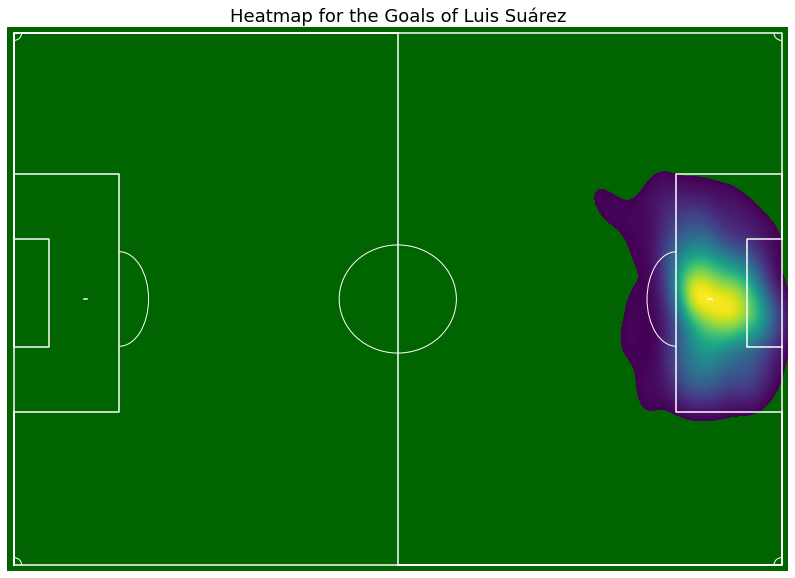

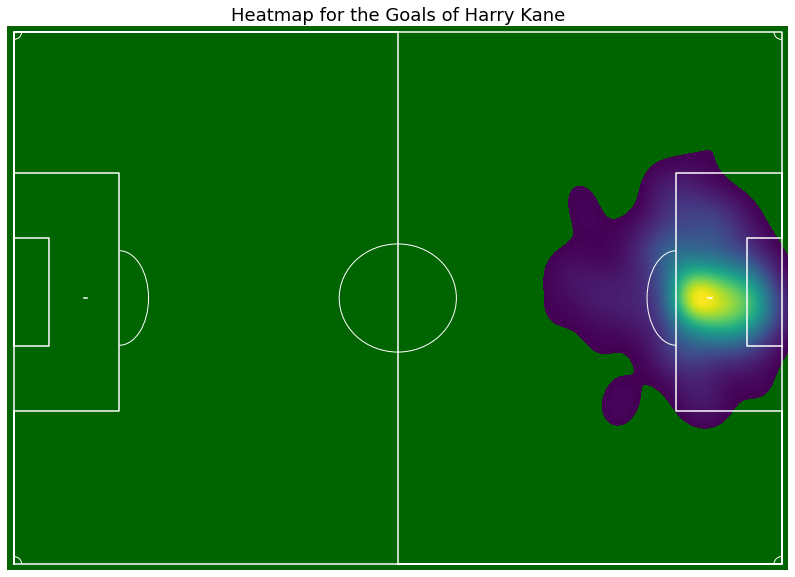

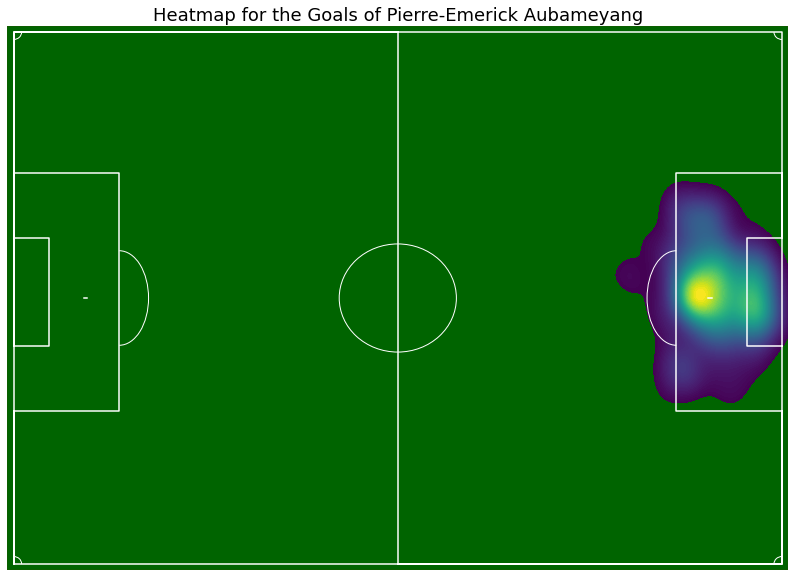

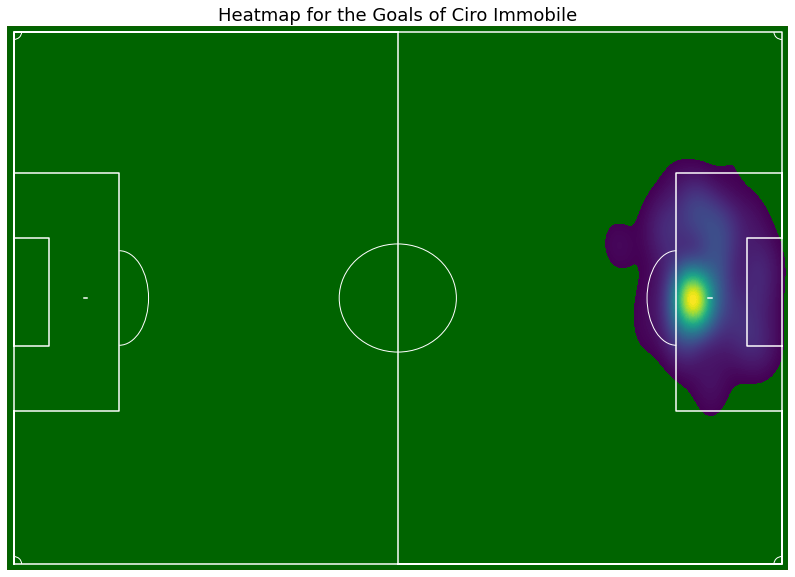

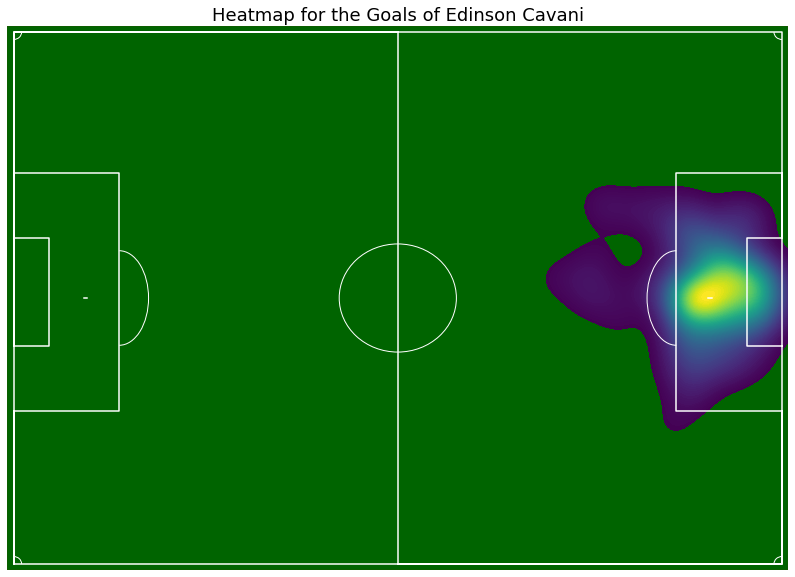

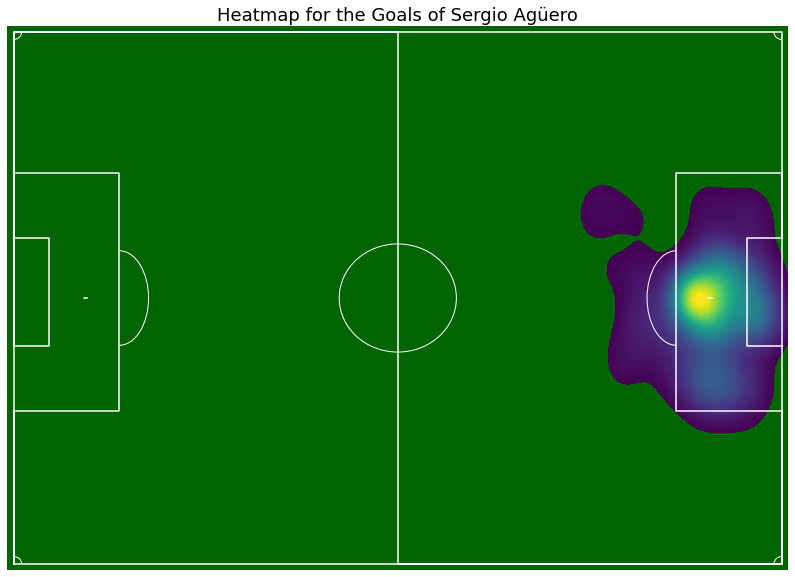

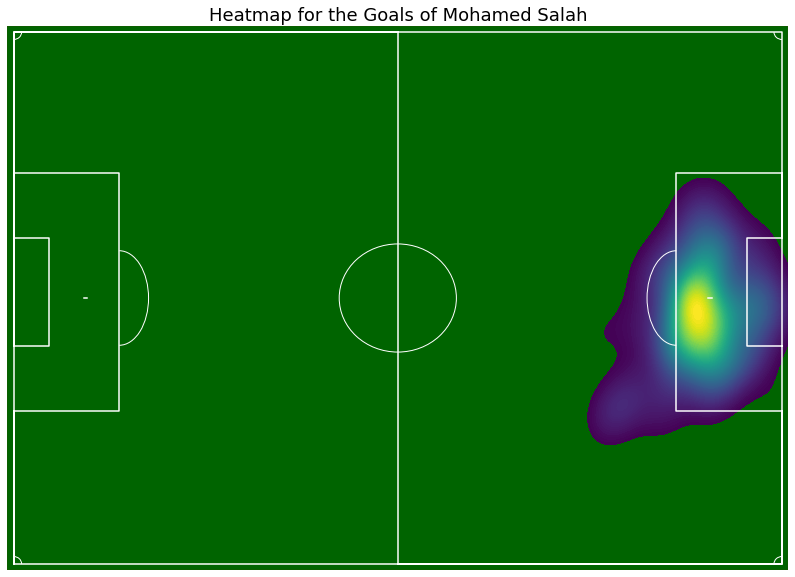

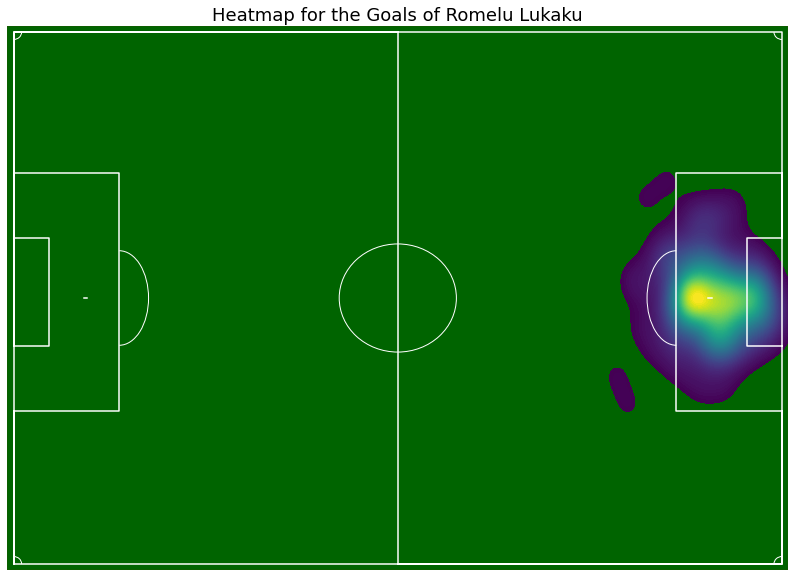

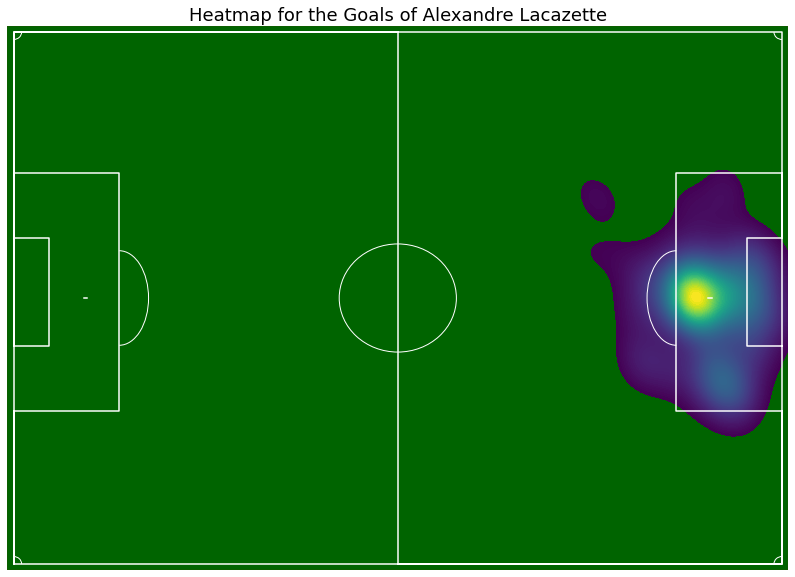

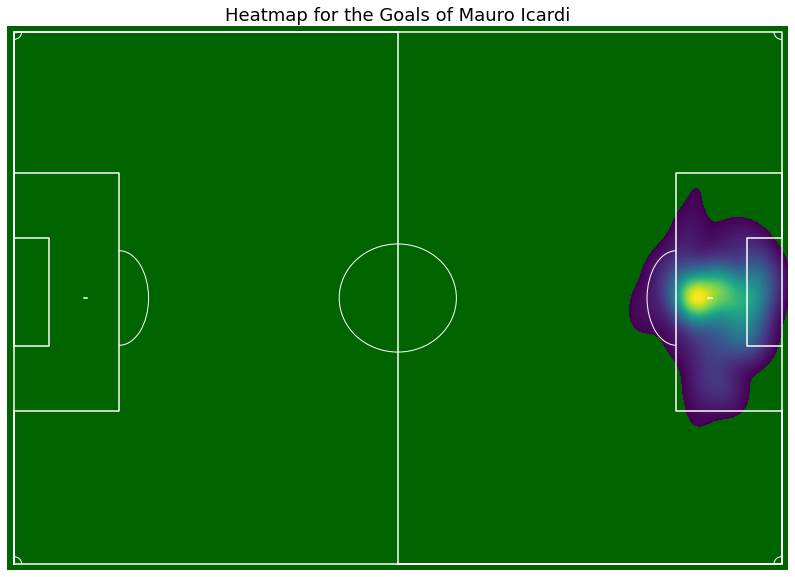

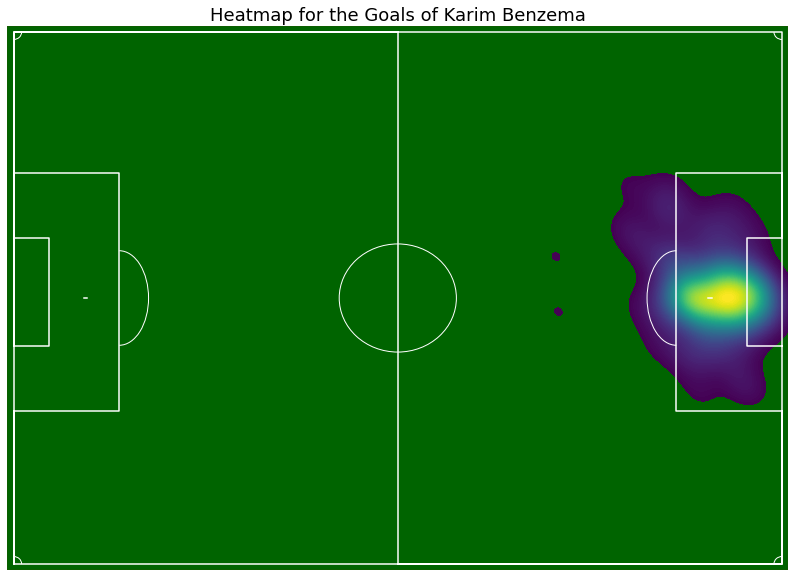

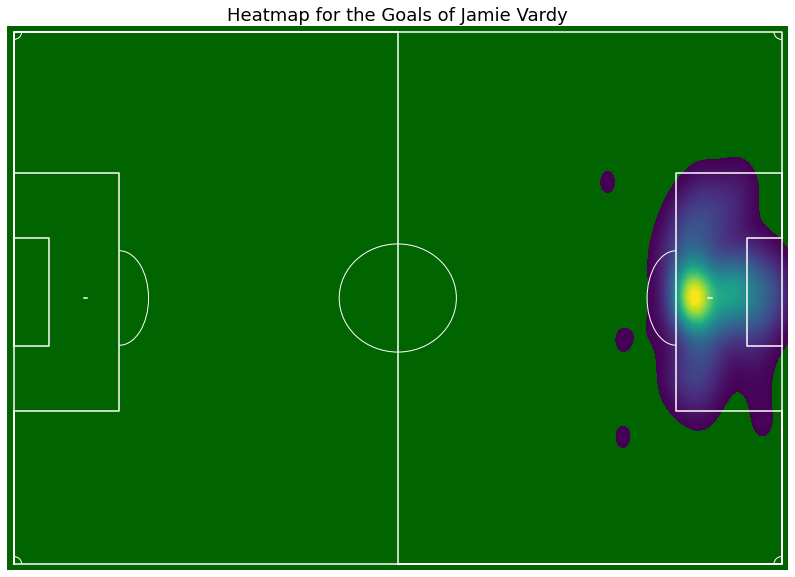

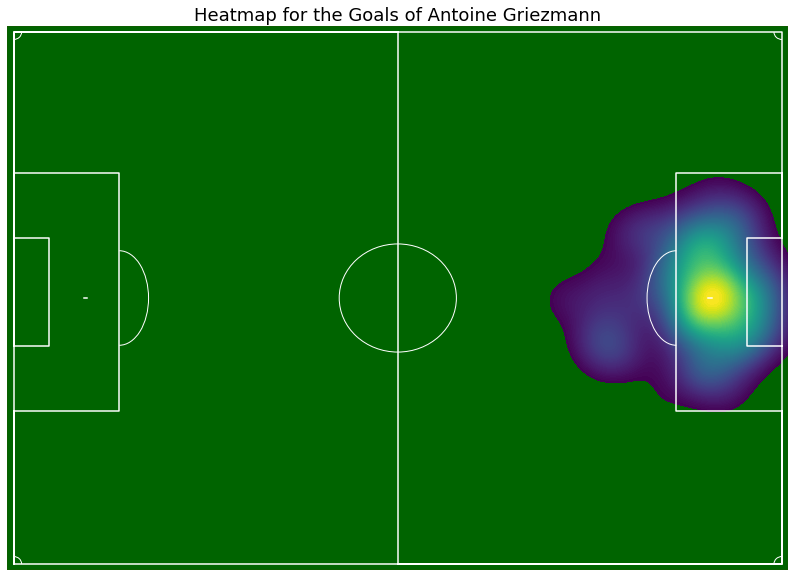

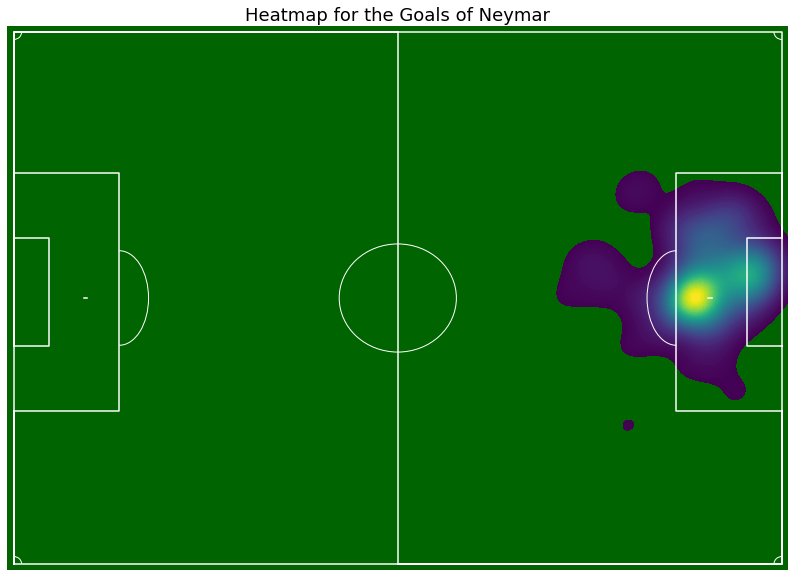

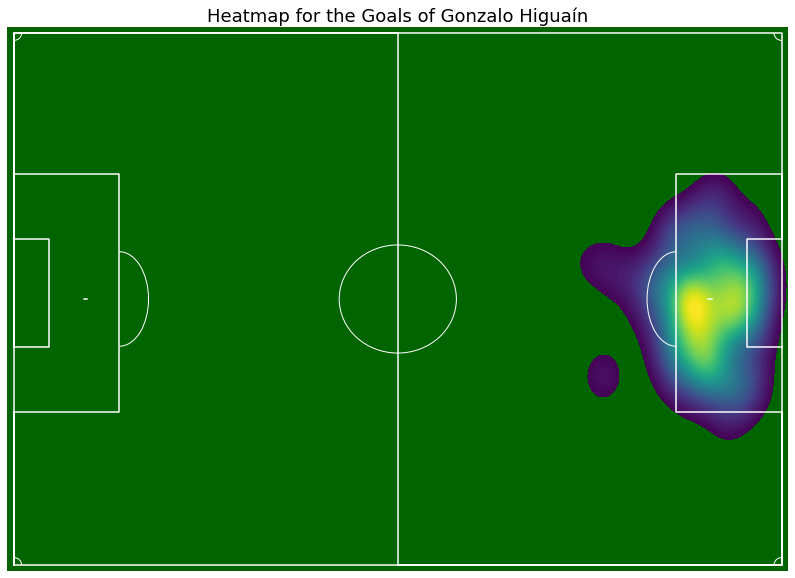

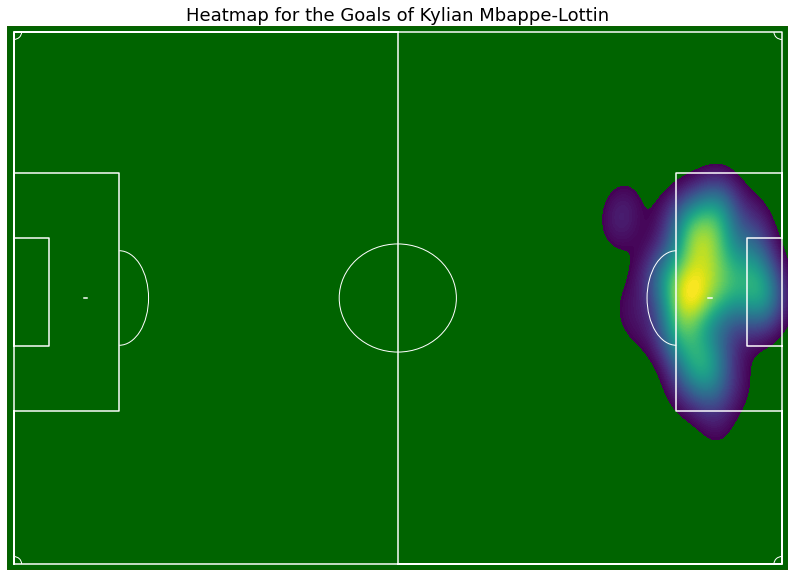

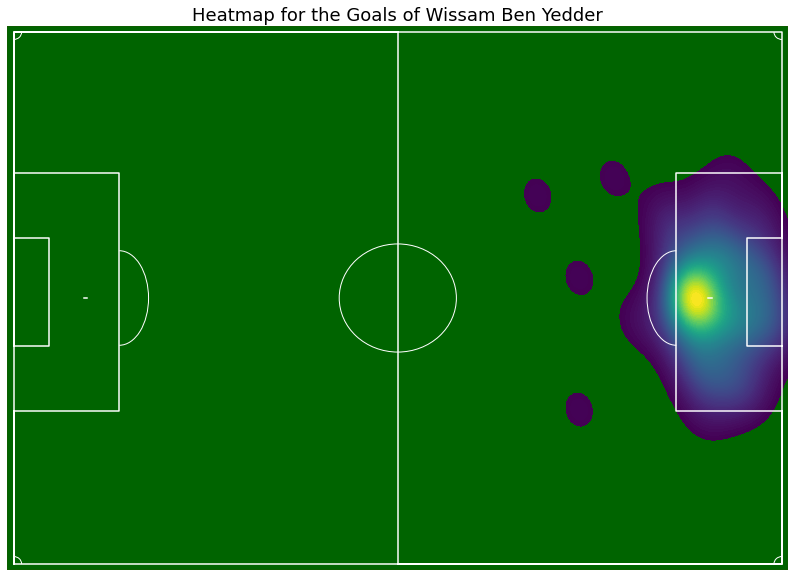

In [11]:
# Heatmap of the Goals for all 20 Top Scorers

for i in top:
    # Filter
    df = goals[goals['name'] == i]
    
    # Ploat Style
    plt.style.use('tableau-colorblind10')
    draw_soccer_pitch(figsize=(14, 10))
    
    # Plot Configuration
    ax = sns.kdeplot(x=df['positionX'], y=df['positionY'], shade=True, n_levels=100, cmap='viridis')
    ax.set_title(f'Heatmap for the Goals of {i}', fontsize=18)
    # plt.savefig(f'pictures/{i}_heatmap.png', transparent=True)
    plt.show()

Vemos que el comportamiento de los graficos de calor de todos los jugadores en el Top 20 es bastante similar.

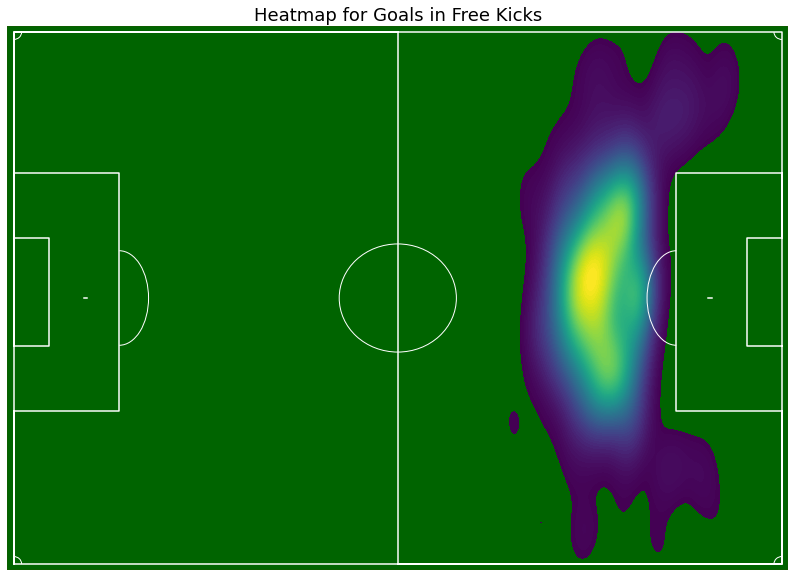

In [12]:
# Heatmap for all the goals made vy Freekick

# Filter
free_kick = goals[(goals['situation'] == 'DirectFreekick')]

# Plot Style
plt.style.use('tableau-colorblind10')
draw_soccer_pitch(figsize=(14, 10))

# Plot configuration
ax = sns.kdeplot(x=free_kick['positionX'], y=free_kick['positionY'], shade=True, n_levels=100, cmap='viridis')
ax.set_title('Heatmap for Goals in Free Kicks', fontsize=18)
# plt.savefig(r"pictures\fk_heatmap.png", transparent=True)
plt.show();